In [9]:
# import necessary libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Path to the image file
image_path = '../images/LT1_seating_uncompressed.png'
output_path = '../images/LT1_seating_ids.png'

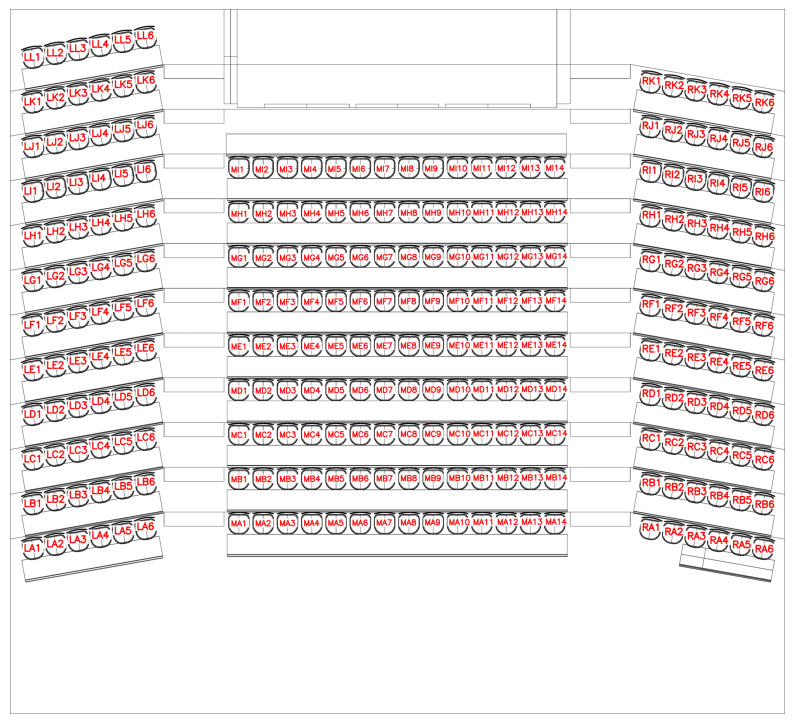

In [11]:
# Check if the image file exists
if not os.path.isfile(image_path):
    print(f"No such file: '{image_path}'")
else:
       # Load an image from file
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)  # IMREAD_UNCHANGED keeps the alpha channel

    # Create a white image of the same size
    white_background = np.ones_like(image, dtype=np.uint8) * 255

    # Merge the image with the white image
    result = cv2.bitwise_and(white_background, image)
    result = cv2.add(result, white_background)

    # convert color from BGR to RGB
    result_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Setting up properties for the text to be overlaid on the image
    font = cv2.FONT_HERSHEY_SIMPLEX  
    font_scale = 2.35
    color = (255, 0, 0)  # blue in BGR color space
    thickness = 8
    padding = 10  # padding for the rectangle around the text
    rectangle_bgr = (255, 255, 255, 85)  # semi-transparent white rectangle

    # Setup for different sections of the image
    setup = [
        {'CAM_LOC': 'L', 'SORTED_LIST': 'ABCDEFGHIJKL', 'x_base': -65, 'y_base': 410, 'x_spacing': 167, 'y_spacing': 330, 'x_mult': 32, 'fontScale': 2.35, 'thickness': 8, 'range_x': 7},
        {'CAM_LOC': 'R', 'SORTED_LIST': 'ABCDEFGHIJK', 'x_base': 4507, 'y_base': 523, 'x_spacing': 167, 'y_spacing': 330, 'x_mult': -32, 'fontScale': 2.35, 'thickness': 8, 'range_x': 7},
        {'CAM_LOC': 'M', 'SORTED_LIST': 'ABCDEFGHI', 'x_base': 1455, 'y_base': 1207, 'x_spacing': 179, 'y_spacing': 327, 'x_mult': 1, 'fontScale': 1.9, 'thickness': 6 , 'pad': 15, 'range_x': 15},
    ]

    for s in setup:
        # Reverse the sorted list for each setup
        letter_list = s['SORTED_LIST'][::-1]

        for x in range(1, s['range_x']):
            # Calculate x-coordinate for text
            x_coor = s['x_base'] + s['x_spacing'] * x
            
            for y in letter_list:
                # Calculate y-coordinate for text
                y_coor = int((s['y_base'] + (s['y_spacing'] * letter_list.index(y))) - x * s['x_mult'])

                # Construct the location identifier
                loc_id = s['CAM_LOC'] + y + str(x)

                # Calculate text width & height to create the correct box
                text_width, text_height = cv2.getTextSize(loc_id, font, s['fontScale'], s['thickness'])[0]

                # Draw rectangle around text
                cv2.rectangle(result_rgb, 
                              (x_coor - padding, y_coor + padding), 
                              (x_coor + text_width + padding, y_coor - text_height - padding), 
                              rectangle_bgr, cv2.FILLED)

                # Put text on image
                image = cv2.putText(result_rgb, loc_id, (x_coor, y_coor), font, s['fontScale'], color, s['thickness'], cv2.LINE_AA)

    # Save the result
    cv2.imwrite(output_path, image)

    # Create a new figure with a specified size (in inches) for visualization
    plt.figure(figsize=(10, 10))
        
    # Display the image
    plt.imshow(image)
    plt.axis('off')  # Hide axis
    plt.show()


In [13]:
##########################################
###debug tests below, can ignore:
##########################################

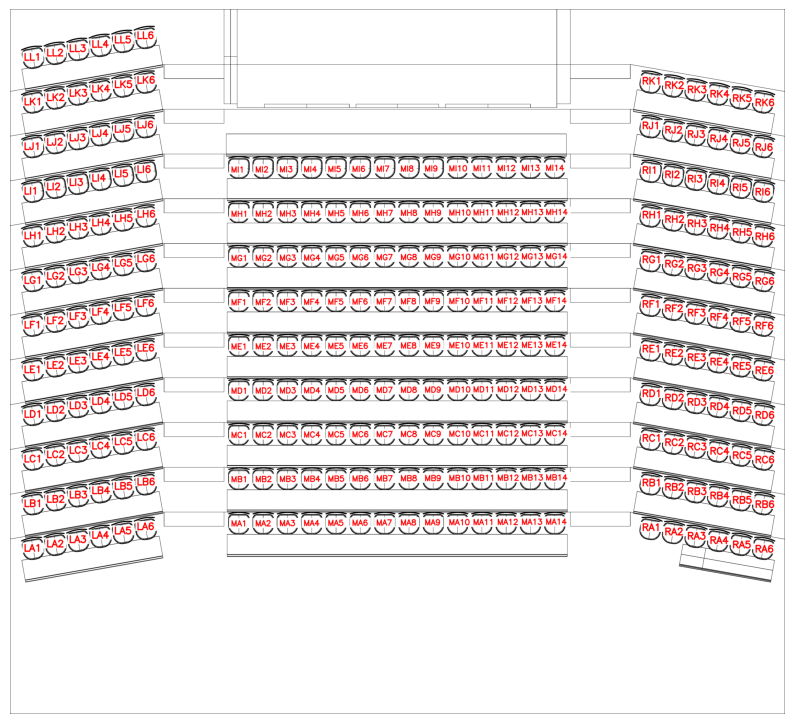

In [147]:
# Check if the file exists
if not os.path.isfile(image_path):
    print(f"No such file: '{image_path}'")
else:
       # Load an image from file
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)  # IMREAD_UNCHANGED keeps the alpha channel

    # Create a white image of the same size
    white_background = np.ones_like(image, dtype=np.uint8) * 255

    # Merge the image with the white image
    result = cv2.bitwise_and(white_background, image)
    result = cv2.add(result, white_background)

    # convert color from BGR to RGB
    result_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    ##########################################
    #DO THE LEFT SIDE FIRST:

    # Set properties.
    font = cv2.FONT_HERSHEY_SIMPLEX  # font
    org = (50, 50)  # origin point of the text, coordinates (x, y)
    fontScale = 2.35  # font scale
    color = (255, 0, 0)  # color of the text in BGR format. This is blue.
    thickness = 8 # line thickness

    CAM_LOC='L'
    SORTED_LIST='ABCDEFGHIJKL'
    LETTER_LIST=SORTED_LIST[::-1]
    
    #starting location
    x_base=-65
    y_base=410
    
    #spacing
    x_spacing=167
    y_spacing=330
    
    x_mult=32 #sets angle
    
    org = [x_base, y_base]  # origin point of the text, coordinates (x, y)

    for x in range(1,7):
    
        org[0]=x_base+x_spacing*x
        for y in LETTER_LIST:
            
            y_int=LETTER_LIST.index(y)
            y_str=str(LETTER_LIST.index(y)+1)
            org[1]=int((y_base+(y_spacing*y_int))-x*x_mult)
            loc_id=CAM_LOC+y+str(x)
            
             # Calculate text width & height to create the correct box
            (text_width, text_height) = cv2.getTextSize(loc_id, font, fontScale, thickness)[0]
            # Set rectangle background to white
            rectangle_bgr = (255, 255, 255,85)
            # Set some padding for the rectangle
            pad = 10
            # Draw the rectangle. The y-coordinate needs adjustment for text_height
            cv2.rectangle(result_rgb, (org[0] - pad, org[1] + pad), (org[0] + text_width + pad, org[1] - text_height - pad), rectangle_bgr, cv2.FILLED)
            image = cv2.putText(result_rgb, loc_id, tuple(org), font, fontScale, color, thickness, cv2.LINE_AA)

##########################################
    CAM_LOC='R'
    SORTED_LIST='ABCDEFGHIJK'
    LETTER_LIST=SORTED_LIST[::-1]
    x_base=4507
    y_base=523
    x_spacing=167
    y_spacing=330
    
    setup_l={}
    x_mult=-32
    org = [x_base, y_base]  # origin point of the text, coordinates (x, y)

    for x in range(1,7):
        org[0]=x_base+x_spacing*x
        for y in LETTER_LIST:
            y_int=LETTER_LIST.index(y)
            y_str=str(LETTER_LIST.index(y)+1)
            org[1]=int((y_base+(y_spacing*y_int))-x*x_mult)
            loc_id=CAM_LOC+y+str(x)
             # Calculate text width & height to create the correct box
            (text_width, text_height) = cv2.getTextSize(loc_id, font, fontScale, thickness)[0]
            # Set rectangle background to white
            rectangle_bgr = (255, 255, 255,85)
            # Set some padding for the rectangle
            pad = 10
            # Draw the rectangle. The y-coordinate needs adjustment for text_height
            cv2.rectangle(result_rgb, (org[0] - pad, org[1] + pad), (org[0] + text_width + pad, org[1] - text_height - pad), rectangle_bgr, cv2.FILLED)
            image = cv2.putText(result_rgb, loc_id, tuple(org), font, fontScale, color, thickness, cv2.LINE_AA)

  ##########################################

##########################################
    CAM_LOC='M'
    SORTED_LIST='ABCDEFGHI'
    LETTER_LIST=SORTED_LIST[::-1]
    x_base=1455
    y_base=1207
    x_spacing=179
    y_spacing=327
    
    fontScale = 1.9  # font scale
    color = (255, 0, 0)  # color of the text in BGR format. This is blue.
    thickness = 6 # line thickness    x_mult=1
    x_mult=1

    org = [x_base, y_base]  # origin point of the text, coordinates (x, y)

    for x in range(1,15):
        org[0]=x_base+x_spacing*x
        for y in LETTER_LIST:
            y_int=LETTER_LIST.index(y)
            y_str=str(LETTER_LIST.index(y)+1)
            org[1]=int((y_base+(y_spacing*y_int))-x*x_mult)
            loc_id=CAM_LOC+y+str(x)
            
            # Calculate text width & height to create the correct box
            (text_width, text_height) = cv2.getTextSize(loc_id, font, fontScale, thickness)[0]

            # Set rectangle background to white
            rectangle_bgr = (255, 255, 255,50)

            # Set some padding for the rectangle
            pad = 15

            # Draw the rectangle. The y-coordinate needs adjustment for text_height
            cv2.rectangle(result_rgb, (org[0] - pad, org[1] + pad), (org[0] + text_width + pad, org[1] - text_height - pad), rectangle_bgr, cv2.FILLED)

            # Then put the text itself
            image = cv2.putText(result_rgb, loc_id, tuple(org), font, fontScale, color, thickness, cv2.LINE_AA)

            # image = cv2.putText(result_rgb, loc_id, tuple(org), font, fontScale, color, thickness, cv2.LINE_AA)

  ##########################################
    # Save the result
    cv2.imwrite(output_path, result_rgb)
    
    # Create a new figure with a specified size (in inches)
    plt.figure(figsize=(10, 10))
        
    # Show the image
    plt.imshow(result_rgb)
    plt.axis('off')  # to hide tick values on X and Y axis
    plt.show()